# Data Teks Twitter Penyakit Menular 2018

In [2]:
import pandas as pd

In [3]:
pm = pd.read_csv('./data/pm 2018.csv').sort_values(by="date")
print(pm.shape[0])
pm.head()

361580


,username,date,time,text,tweetID,placeID,daerah,lokasi,longitude,latitude
10745,@lk_lovegood,2018-01-01,13:11,sakit perut nat,947711820948635649,,,,,
10810,@wiki019,2018-01-01,11:31,X bestnya ride sakit perut ni,947686662766596098,,,,,
10811,@joungkoo,2018-01-01,11:30,Mencret lu? Diare tuh,947686539198218240,,,,,
10812,@hanshohoho,2018-01-01,11:29,Sakit perut damar. Gara2 makan baso. Hehe,947686252228231168,,,,,
10813,@doubleofme,2018-01-01,11:28,Sakit perut pulak makan nasi lemak pagi tadi.,947685963790041088,,,,,


In [4]:
import string
import re

def tweet_lower(text):
    lower = text.lower()
    no_number = re.sub(r'\d+', '', lower)
    no_url = re.sub(r"http\S+", "", no_number)
    no_dash = no_url.replace("-", " ")
    no_punctuation = no_dash.translate(str.maketrans('', '', string.punctuation))
    no_white_space = re.sub(' +', ' ', no_punctuation)
    return no_white_space

result = []
for text in pm['text']:
    result.append(tweet_lower(text))
pm['text'] = result
pm.head()

,username,date,time,text,tweetID,placeID,daerah,lokasi,longitude,latitude
10745,@lk_lovegood,2018-01-01,13:11,sakit perut nat,947711820948635649,,,,,
10810,@wiki019,2018-01-01,11:31,x bestnya ride sakit perut ni,947686662766596098,,,,,
10811,@joungkoo,2018-01-01,11:30,mencret lu diare tuh,947686539198218240,,,,,
10812,@hanshohoho,2018-01-01,11:29,sakit perut damar gara makan baso hehe,947686252228231168,,,,,
10813,@doubleofme,2018-01-01,11:28,sakit perut pulak makan nasi lemak pagi tadi,947685963790041088,,,,,


In [5]:
tuberkulosis = pm[pm['text'].str.contains('tuberkulosis')]
print("tuberkulosis: "+ str(tuberkulosis.shape[0]))
non_tuberkulosis = pm[~pm['text'].str.contains('tuberkulosis')]

tuberculosis = non_tuberkulosis[non_tuberkulosis['text'].str.contains('tuberculosis')]
print("tuberculosis: "+ str(tuberculosis.shape[0]))
non_tuberculosis = non_tuberkulosis[~non_tuberkulosis['text'].str.contains('tuberculosis')]

tb_paru = non_tuberculosis[non_tuberculosis['text'].str.contains('tb paru|tbparu')]
print("tb paru: "+ str(tb_paru.shape[0]))
non_tb_paru = non_tuberculosis[~non_tuberculosis['text'].str.contains('tb paru|tbparu')]

tbc_paru = non_tb_paru[non_tb_paru['text'].str.contains('tbc paru|tbcparu')]
print("tbc paru: "+ str(tbc_paru.shape[0]))
non_tbc_paru = non_tb_paru[~non_tb_paru['text'].str.contains('tbc paru|tbcparu')]

mycobacterium = non_tbc_paru[non_tbc_paru['text'].str.contains('mycobacterium')]
print("mycobacterium: "+ str(mycobacterium.shape[0]))
non_mycobacterium = non_tbc_paru[~non_tbc_paru['text'].str.contains('mycobacterium')]

tosstbc = non_mycobacterium[non_mycobacterium['text'].str.contains('tosstbc')]
print("tosstbc: "+ str(tosstbc.shape[0]))
non_tosstbc = non_mycobacterium[~non_mycobacterium['text'].str.contains('tosstbc')]

batuk_tbc = non_tosstbc[non_tosstbc['text'].str.contains('batuk tbc')]
print("batuk tbc: "+ str(batuk_tbc.shape[0]))
non_batuk_tbc = non_tosstbc[~non_tosstbc['text'].str.contains('batuk tbc')]

batuk_tb = non_batuk_tbc[non_batuk_tbc['text'].str.contains('batuk tb')]
print("batuk tb: "+ str(batuk_tb.shape[0]))
non_batuk_tb = non_batuk_tbc[~non_batuk_tbc['text'].str.contains('batuk tb')]

isoniazid = non_batuk_tb[non_batuk_tb['text'].str.contains('isoniazid')]
print("isoniazid: "+ str(isoniazid.shape[0]))
non_isoniazid = non_batuk_tb[~non_batuk_tb['text'].str.contains('isoniazid')]

imunisasi_bcg = non_isoniazid[non_isoniazid['text'].str.contains('imunisasi bcg')]
print("imunisasi bcg: "+ str(imunisasi_bcg.shape[0]))
non_imunisasi_bcg = non_isoniazid[~non_isoniazid['text'].str.contains('imunisasi bcg')]

print()

diare = non_imunisasi_bcg[non_imunisasi_bcg['text'].str.contains('diare|diaré|ｄｉａｒｅ')]
print("diare: "+ str(diare.shape[0]))
non_diare = non_imunisasi_bcg[~non_imunisasi_bcg['text'].str.contains('diare|diaré|ｄｉａｒｅ')]

imodium = non_diare[non_diare['text'].str.contains('imodium')]
print("imodium: "+ str(imodium.shape[0]))
non_imodium = non_diare[~non_diare['text'].str.contains('imodium')]

diapet = non_imodium[non_imodium['text'].str.contains('diapet')]
print("diapet: "+ str(diapet.shape[0]))
non_diapet = non_imodium[~non_imodium['text'].str.contains('diapet')]

sakit_perut = non_diapet[non_diapet['text'].str.contains('sakit perut|sakitperut|ˢᵃᵏⁱᵗ ᵖᵉʳᵘᵗ|sàkit perut')]
print("sakit perut: "+ str(sakit_perut.shape[0]))
non_sakit_perut = non_diapet[~non_diapet['text'].str.contains('sakit perut|sakitperut|ˢᵃᵏⁱᵗ ᵖᵉʳᵘᵗ|sàkit perut')]

mules = non_sakit_perut[non_sakit_perut['text'].str.contains('mules|ｍｕｌｅｓ|mulês')]
print("mules: "+ str(mules.shape[0]))
non_mules = non_sakit_perut[~non_sakit_perut['text'].str.contains('mules|ｍｕｌｅｓ|mulês')]

mencret = non_mules[non_mules['text'].str.contains('mencret|méncrét|mencrét|mencrèt')]
print("mencret: "+ str(mencret.shape[0]))
non_mencret = non_mules[~non_mules['text'].str.contains('mencret|méncrét|mencrét|mencrèt')]

menceret = non_mencret[non_mencret['text'].str.contains('menceret')]
print("menceret: "+ str(menceret.shape[0]))
non_menceret = non_mencret[~non_mencret['text'].str.contains('menceret')]

salmonella = non_menceret[non_menceret['text'].str.contains('salmonella')]
print("salmonella: "+ str(salmonella.shape[0]))
non_salmonella = non_menceret[~non_menceret['text'].str.contains('salmonella')]

e_coli = non_salmonella[non_salmonella['text'].str.contains('coli')]
print("e coli: "+ str(e_coli.shape[0]))
non_e_coli = non_salmonella[~non_salmonella['text'].str.contains('coli')]

oralit = non_e_coli[non_e_coli['text'].str.contains('oralit')]
print("oralit: "+ str(oralit.shape[0]))
non_oralit = non_e_coli[~non_e_coli['text'].str.contains('oralit')]

tuberkulosis: 2484
tuberculosis: 1178
tb paru: 496
tbc paru: 323
mycobacterium: 188
tosstbc: 32
batuk tbc: 156
batuk tb: 26
isoniazid: 45
imunisasi bcg: 42

diare: 39442
imodium: 271
diapet: 2082
sakit perut: 166783
mules: 109414
mencret: 31944
menceret: 123
salmonella: 2123
e coli: 2302
oralit: 2126


In [6]:
tuberkulosis_geo = tuberkulosis[tuberkulosis['placeID'] != ' '].sort_values(by="date").drop_duplicates()
print("tuberkulosis: " + str(tuberkulosis_geo.shape[0]))

tuberculosis_geo = tuberculosis[tuberculosis['placeID'] != ' '].sort_values(by="date").drop_duplicates()
print("tuberculosis: " + str(tuberculosis_geo.shape[0]))

tb_paru_geo = tb_paru[tb_paru['placeID'] != ' '].sort_values(by="date").drop_duplicates()
print("tb paru: " + str(tb_paru_geo.shape[0]))

tbc_paru_geo = tbc_paru[tbc_paru['placeID'] != ' '].sort_values(by="date").drop_duplicates()
print("tbc paru: " + str(tbc_paru_geo.shape[0]))

mycobacterium_geo = mycobacterium[mycobacterium['placeID'] != ' '].sort_values(by="date").drop_duplicates()
print("mycobacterium: " + str(mycobacterium_geo.shape[0]))

tosstbc_geo = tosstbc[tosstbc['placeID'] != ' '].sort_values(by="date").drop_duplicates()
print("tosstbc: " + str(tosstbc_geo.shape[0]))

batuk_tbc_geo = batuk_tbc[batuk_tbc['placeID'] != ' '].sort_values(by="date").drop_duplicates()
print("batuk tbc: " + str(batuk_tbc_geo.shape[0]))

batuk_tb_geo = batuk_tb[batuk_tb['placeID'] != ' '].sort_values(by="date").drop_duplicates()
print("batuk tb: " + str(batuk_tb_geo.shape[0]))

isoniazid_geo = isoniazid[isoniazid['placeID'] != ' '].sort_values(by="date").drop_duplicates()
print("isoniazid: " + str(isoniazid_geo.shape[0]))

imunisasi_bcg_geo = imunisasi_bcg[imunisasi_bcg['placeID'] != ' '].sort_values(by="date").drop_duplicates()
print("imunisasi bcg: " + str(imunisasi_bcg_geo.shape[0]))

print()

diare_geo = diare[diare['placeID'] != ' '].sort_values(by="date").drop_duplicates()
print("diare: " + str(diare_geo.shape[0]))

imodium_geo = imodium[imodium['placeID'] != ' '].sort_values(by="date").drop_duplicates()
print("imodium: " + str(imodium_geo.shape[0]))

diapet_geo = diapet[diapet['placeID'] != ' '].sort_values(by="date").drop_duplicates()
print("diapet: " + str(diapet_geo.shape[0]))

sakit_perut_geo = sakit_perut[sakit_perut['placeID'] != ' '].sort_values(by="date").drop_duplicates()
print("sakit perut: " + str(sakit_perut_geo.shape[0]))

mules_geo = mules[mules['placeID'] != ' '].sort_values(by="date").drop_duplicates()
print("mules: " + str(mules_geo.shape[0]))

mencret_geo = mencret[mencret['placeID'] != ' '].sort_values(by="date").drop_duplicates()
print("mencret: " + str(mencret_geo.shape[0]))

menceret_geo = menceret[menceret['placeID'] != ' '].sort_values(by="date").drop_duplicates()
print("menceret: " + str(menceret_geo.shape[0]))

salmonella_geo = salmonella[salmonella['placeID'] != ' '].sort_values(by="date").drop_duplicates()
print("salmonella: " + str(salmonella_geo.shape[0]))

e_coli_geo = e_coli[e_coli['placeID'] != ' '].sort_values(by="date").drop_duplicates()
print("e coli: " + str(e_coli_geo.shape[0]))

oralit_geo = oralit[oralit['placeID'] != ' '].sort_values(by="date").drop_duplicates()
print("oralit: " + str(oralit_geo.shape[0]))

tuberkulosis: 72
tuberculosis: 34
tb paru: 25
tbc paru: 2
mycobacterium: 5
tosstbc: 0
batuk tbc: 1
batuk tb: 1
isoniazid: 1
imunisasi bcg: 1

diare: 1046
imodium: 11
diapet: 41
sakit perut: 8925
mules: 3154
mencret: 650
menceret: 4
salmonella: 53
e coli: 63
oralit: 38


In [7]:
tuberkulosis_id = tuberkulosis_geo[tuberkulosis_geo["lokasi"].str.contains("Indonesia|Jawa|Sulawesi|Yogyakarta|Jambi|Gorontalo|Banten|Jakarta|Riau|Sumatera|Kampung kandang|Menteng|Maumere|D 1537 OO|Manado|Sekolah Kartini|Bumi tamalanrea|Bogor|Gramedia|Gilimanuk|Bendungan hilir|Nusa Tenggara|Toilet|Cianjur|juanda|Fakultas Ekonomi|UNDIP|Cikunir|cibitung|tinjomoyo|Meruya|KFC|Terminal 2|Dinas Pekerjaan|Rumah Makeupuccino|The Danted Mencret|Sekumpul|Cipaganti|Ronggowarsito|Pakem|Tugel|Aceh|RS UIN|Dago|Lampung|Pizza|Oseng|Sudirman|Bintaro|Malioboro|IGD|ITB|Majalengka|Sanggar Agung|Globalresourcestrader|Sarangan")].reset_index(drop=True)
print("tuberkulosis: " + str(tuberkulosis_id.shape[0]))

tuberculosis_id = tuberculosis_geo[tuberculosis_geo["lokasi"].str.contains("Indonesia|Jawa|Sulawesi|Yogyakarta|Jambi|Gorontalo|Banten|Jakarta|Riau|Sumatera|Kampung kandang|Menteng|Maumere|D 1537 OO|Manado|Sekolah Kartini|Bumi tamalanrea|Bogor|Gramedia|Gilimanuk|Bendungan hilir|Nusa Tenggara|Toilet|Cianjur|juanda|Fakultas Ekonomi|UNDIP|Cikunir|cibitung|tinjomoyo|Meruya|KFC|Terminal 2|Dinas Pekerjaan|Rumah Makeupuccino|The Danted Mencret|Sekumpul|Cipaganti|Ronggowarsito|Pakem|Tugel|Aceh|RS UIN|Dago|Lampung|Pizza|Oseng|Sudirman|Bintaro|Malioboro|IGD|ITB|Majalengka|Sanggar Agung|Globalresourcestrader|Sarangan")].reset_index(drop=True)
print("tuberculosis: " + str(tuberculosis_id.shape[0]))

tb_paru_id = tb_paru_geo[tb_paru_geo["lokasi"].str.contains("Indonesia|Jawa|Sulawesi|Yogyakarta|Jambi|Gorontalo|Banten|Jakarta|Riau|Sumatera|Kampung kandang|Menteng|Maumere|D 1537 OO|Manado|Sekolah Kartini|Bumi tamalanrea|Bogor|Gramedia|Gilimanuk|Bendungan hilir|Nusa Tenggara|Toilet|Cianjur|juanda|Fakultas Ekonomi|UNDIP|Cikunir|cibitung|tinjomoyo|Meruya|KFC|Terminal 2|Dinas Pekerjaan|Rumah Makeupuccino|The Danted Mencret|Sekumpul|Cipaganti|Ronggowarsito|Pakem|Tugel|Aceh|RS UIN|Dago|Lampung|Pizza|Oseng|Sudirman|Bintaro|Malioboro|IGD|ITB|Majalengka|Sanggar Agung|Globalresourcestrader|Sarangan")].reset_index(drop=True)
print("tuberkulosis: " + str(tb_paru_id.shape[0]))

tbc_paru_id = tbc_paru_geo[tbc_paru_geo["lokasi"].str.contains("Indonesia|Jawa|Sulawesi|Yogyakarta|Jambi|Gorontalo|Banten|Jakarta|Riau|Sumatera|Kampung kandang|Menteng|Maumere|D 1537 OO|Manado|Sekolah Kartini|Bumi tamalanrea|Bogor|Gramedia|Gilimanuk|Bendungan hilir|Nusa Tenggara|Toilet|Cianjur|juanda|Fakultas Ekonomi|UNDIP|Cikunir|cibitung|tinjomoyo|Meruya|KFC|Terminal 2|Dinas Pekerjaan|Rumah Makeupuccino|The Danted Mencret|Sekumpul|Cipaganti|Ronggowarsito|Pakem|Tugel|Aceh|RS UIN|Dago|Lampung|Pizza|Oseng|Sudirman|Bintaro|Malioboro|IGD|ITB|Majalengka|Sanggar Agung|Globalresourcestrader|Sarangan")].reset_index(drop=True)
print("tuberkulosis: " + str(tbc_paru_id.shape[0]))

mycobacterium_id = mycobacterium_geo[mycobacterium_geo["lokasi"].str.contains("Indonesia|Jawa|Sulawesi|Yogyakarta|Jambi|Gorontalo|Banten|Jakarta|Riau|Sumatera|Kampung kandang|Menteng|Maumere|D 1537 OO|Manado|Sekolah Kartini|Bumi tamalanrea|Bogor|Gramedia|Gilimanuk|Bendungan hilir|Nusa Tenggara|Toilet|Cianjur|juanda|Fakultas Ekonomi|UNDIP|Cikunir|cibitung|tinjomoyo|Meruya|KFC|Terminal 2|Dinas Pekerjaan|Rumah Makeupuccino|The Danted Mencret|Sekumpul|Cipaganti|Ronggowarsito|Pakem|Tugel|Aceh|RS UIN|Dago|Lampung|Pizza|Oseng|Sudirman|Bintaro|Malioboro|IGD|ITB|Majalengka|Sanggar Agung|Globalresourcestrader|Sarangan")].reset_index(drop=True)
print("mycobacterium: " + str(mycobacterium_id.shape[0]))

tosstbc_id = tosstbc_geo[tosstbc_geo["lokasi"].str.contains("Indonesia|Jawa|Sulawesi|Yogyakarta|Jambi|Gorontalo|Banten|Jakarta|Riau|Sumatera|Kampung kandang|Menteng|Maumere|D 1537 OO|Manado|Sekolah Kartini|Bumi tamalanrea|Bogor|Gramedia|Gilimanuk|Bendungan hilir|Nusa Tenggara|Toilet|Cianjur|juanda|Fakultas Ekonomi|UNDIP|Cikunir|cibitung|tinjomoyo|Meruya|KFC|Terminal 2|Dinas Pekerjaan|Rumah Makeupuccino|The Danted Mencret|Sekumpul|Cipaganti|Ronggowarsito|Pakem|Tugel|Aceh|RS UIN|Dago|Lampung|Pizza|Oseng|Sudirman|Bintaro|Malioboro|IGD|ITB|Majalengka|Sanggar Agung|Globalresourcestrader|Sarangan")].reset_index(drop=True)
print("tosstbc: " + str(tosstbc_id.shape[0]))

batuk_tbc_id = batuk_tbc_geo[batuk_tbc_geo["lokasi"].str.contains("Indonesia|Jawa|Sulawesi|Yogyakarta|Jambi|Gorontalo|Banten|Jakarta|Riau|Sumatera|Kampung kandang|Menteng|Maumere|D 1537 OO|Manado|Sekolah Kartini|Bumi tamalanrea|Bogor|Gramedia|Gilimanuk|Bendungan hilir|Nusa Tenggara|Toilet|Cianjur|juanda|Fakultas Ekonomi|UNDIP|Cikunir|cibitung|tinjomoyo|Meruya|KFC|Terminal 2|Dinas Pekerjaan|Rumah Makeupuccino|The Danted Mencret|Sekumpul|Cipaganti|Ronggowarsito|Pakem|Tugel|Aceh|RS UIN|Dago|Lampung|Pizza|Oseng|Sudirman|Bintaro|Malioboro|IGD|ITB|Majalengka|Sanggar Agung|Globalresourcestrader|Sarangan")].reset_index(drop=True)
print("batuk tbc: " + str(batuk_tbc_id.shape[0]))

batuk_tb_id = batuk_tb_geo[batuk_tb_geo["lokasi"].str.contains("Indonesia|Jawa|Sulawesi|Yogyakarta|Jambi|Gorontalo|Banten|Jakarta|Riau|Sumatera|Kampung kandang|Menteng|Maumere|D 1537 OO|Manado|Sekolah Kartini|Bumi tamalanrea|Bogor|Gramedia|Gilimanuk|Bendungan hilir|Nusa Tenggara|Toilet|Cianjur|juanda|Fakultas Ekonomi|UNDIP|Cikunir|cibitung|tinjomoyo|Meruya|KFC|Terminal 2|Dinas Pekerjaan|Rumah Makeupuccino|The Danted Mencret|Sekumpul|Cipaganti|Ronggowarsito|Pakem|Tugel|Aceh|RS UIN|Dago|Lampung|Pizza|Oseng|Sudirman|Bintaro|Malioboro|IGD|ITB|Majalengka|Sanggar Agung|Globalresourcestrader|Sarangan")].reset_index(drop=True)
print("batuk tb: " + str(batuk_tb_id.shape[0]))

isoniazid_id = isoniazid_geo[isoniazid_geo["lokasi"].str.contains("Indonesia|Jawa|Sulawesi|Yogyakarta|Jambi|Gorontalo|Banten|Jakarta|Riau|Sumatera|Kampung kandang|Menteng|Maumere|D 1537 OO|Manado|Sekolah Kartini|Bumi tamalanrea|Bogor|Gramedia|Gilimanuk|Bendungan hilir|Nusa Tenggara|Toilet|Cianjur|juanda|Fakultas Ekonomi|UNDIP|Cikunir|cibitung|tinjomoyo|Meruya|KFC|Terminal 2|Dinas Pekerjaan|Rumah Makeupuccino|The Danted Mencret|Sekumpul|Cipaganti|Ronggowarsito|Pakem|Tugel|Aceh|RS UIN|Dago|Lampung|Pizza|Oseng|Sudirman|Bintaro|Malioboro|IGD|ITB|Majalengka|Sanggar Agung|Globalresourcestrader|Sarangan")].reset_index(drop=True)
print("isoniazid: " + str(isoniazid_id.shape[0]))

imunisasi_bcg_id = imunisasi_bcg_geo[imunisasi_bcg_geo["lokasi"].str.contains("Indonesia|Jawa|Sulawesi|Yogyakarta|Jambi|Gorontalo|Banten|Jakarta|Riau|Sumatera|Kampung kandang|Menteng|Maumere|D 1537 OO|Manado|Sekolah Kartini|Bumi tamalanrea|Bogor|Gramedia|Gilimanuk|Bendungan hilir|Nusa Tenggara|Toilet|Cianjur|juanda|Fakultas Ekonomi|UNDIP|Cikunir|cibitung|tinjomoyo|Meruya|KFC|Terminal 2|Dinas Pekerjaan|Rumah Makeupuccino|The Danted Mencret|Sekumpul|Cipaganti|Ronggowarsito|Pakem|Tugel|Aceh|RS UIN|Dago|Lampung|Pizza|Oseng|Sudirman|Bintaro|Malioboro|IGD|ITB|Majalengka|Sanggar Agung|Globalresourcestrader|Sarangan")].reset_index(drop=True)
print("imunisasi bcg: " + str(imunisasi_bcg_id.shape[0]))

print()

diare_id = diare_geo[diare_geo["lokasi"].str.contains("Indonesia|Jawa|Sulawesi|Yogyakarta|Jambi|Gorontalo|Banten|Jakarta|Riau|Sumatera|Kampung kandang|Menteng|Maumere|D 1537 OO|Manado|Sekolah Kartini|Bumi tamalanrea|Bogor|Gramedia|Gilimanuk|Bendungan hilir|Nusa Tenggara|Toilet|Cianjur|juanda|Fakultas Ekonomi|UNDIP|Cikunir|cibitung|tinjomoyo|Meruya|KFC|Terminal 2|Dinas Pekerjaan|Rumah Makeupuccino|The Danted Mencret|Sekumpul|Cipaganti|Ronggowarsito|Pakem|Tugel|Aceh|RS UIN|Dago|Lampung|Pizza|Oseng|Sudirman|Bintaro|Malioboro|IGD|ITB|Majalengka|Sanggar Agung|Globalresourcestrader|Sarangan")].reset_index(drop=True)
print("diare: " + str(diare_id.shape[0]))

imodium_id = imodium_geo[imodium_geo["lokasi"].str.contains("Indonesia|Jawa|Sulawesi|Yogyakarta|Jambi|Gorontalo|Banten|Jakarta|Riau|Sumatera|Kampung kandang|Menteng|Maumere|D 1537 OO|Manado|Sekolah Kartini|Bumi tamalanrea|Bogor|Gramedia|Gilimanuk|Bendungan hilir|Nusa Tenggara|Toilet|Cianjur|juanda|Fakultas Ekonomi|UNDIP|Cikunir|cibitung|tinjomoyo|Meruya|KFC|Terminal 2|Dinas Pekerjaan|Rumah Makeupuccino|The Danted Mencret|Sekumpul|Cipaganti|Ronggowarsito|Pakem|Tugel|Aceh|RS UIN|Dago|Lampung|Pizza|Oseng|Sudirman|Bintaro|Malioboro|IGD|ITB|Majalengka|Sanggar Agung|Globalresourcestrader|Sarangan")].reset_index(drop=True)
print("imodium: " + str(imodium_id.shape[0]))

diapet_id = diapet_geo[diapet_geo["lokasi"].str.contains("Indonesia|Jawa|Sulawesi|Yogyakarta|Jambi|Gorontalo|Banten|Jakarta|Riau|Sumatera|Kampung kandang|Menteng|Maumere|D 1537 OO|Manado|Sekolah Kartini|Bumi tamalanrea|Bogor|Gramedia|Gilimanuk|Bendungan hilir|Nusa Tenggara|Toilet|Cianjur|juanda|Fakultas Ekonomi|UNDIP|Cikunir|cibitung|tinjomoyo|Meruya|KFC|Terminal 2|Dinas Pekerjaan|Rumah Makeupuccino|The Danted Mencret|Sekumpul|Cipaganti|Ronggowarsito|Pakem|Tugel|Aceh|RS UIN|Dago|Lampung|Pizza|Oseng|Sudirman|Bintaro|Malioboro|IGD|ITB|Majalengka|Sanggar Agung|Globalresourcestrader|Sarangan")].reset_index(drop=True)
print("diapet: " + str(diapet_id.shape[0]))

sakit_perut_id = sakit_perut_geo[sakit_perut_geo["lokasi"].str.contains("Indonesia|Jawa|Sulawesi|Yogyakarta|Jambi|Gorontalo|Banten|Jakarta|Riau|Sumatera|Kampung kandang|Menteng|Maumere|D 1537 OO|Manado|Sekolah Kartini|Bumi tamalanrea|Bogor|Gramedia|Gilimanuk|Bendungan hilir|Nusa Tenggara|Toilet|Cianjur|juanda|Fakultas Ekonomi|UNDIP|Cikunir|cibitung|tinjomoyo|Meruya|KFC|Terminal 2|Dinas Pekerjaan|Rumah Makeupuccino|The Danted Mencret|Sekumpul|Cipaganti|Ronggowarsito|Pakem|Tugel|Aceh|RS UIN|Dago|Lampung|Pizza|Oseng|Sudirman|Bintaro|Malioboro|IGD|ITB|Majalengka|Sanggar Agung|Globalresourcestrader|Sarangan")].reset_index(drop=True)
print("sakit perut: " + str(sakit_perut_id.shape[0]))

mules_id = mules_geo[mules_geo["lokasi"].str.contains("Indonesia|Jawa|Sulawesi|Yogyakarta|Jambi|Gorontalo|Banten|Jakarta|Riau|Sumatera|Kampung kandang|Menteng|Maumere|D 1537 OO|Manado|Sekolah Kartini|Bumi tamalanrea|Bogor|Gramedia|Gilimanuk|Bendungan hilir|Nusa Tenggara|Toilet|Cianjur|juanda|Fakultas Ekonomi|UNDIP|Cikunir|cibitung|tinjomoyo|Meruya|KFC|Terminal 2|Dinas Pekerjaan|Rumah Makeupuccino|The Danted Mencret|Sekumpul|Cipaganti|Ronggowarsito|Pakem|Tugel|Aceh|RS UIN|Dago|Lampung|Pizza|Oseng|Sudirman|Bintaro|Malioboro|IGD|ITB|Majalengka|Sanggar Agung|Globalresourcestrader|Sarangan")].reset_index(drop=True)
print("mules: " + str(mules_id.shape[0]))

mencret_id = mencret_geo[mencret_geo["lokasi"].str.contains("Indonesia|Jawa|Sulawesi|Yogyakarta|Jambi|Gorontalo|Banten|Jakarta|Riau|Sumatera|Kampung kandang|Menteng|Maumere|D 1537 OO|Manado|Sekolah Kartini|Bumi tamalanrea|Bogor|Gramedia|Gilimanuk|Bendungan hilir|Nusa Tenggara|Toilet|Cianjur|juanda|Fakultas Ekonomi|UNDIP|Cikunir|cibitung|tinjomoyo|Meruya|KFC|Terminal 2|Dinas Pekerjaan|Rumah Makeupuccino|The Danted Mencret|Sekumpul|Cipaganti|Ronggowarsito|Pakem|Tugel|Aceh|RS UIN|Dago|Lampung|Pizza|Oseng|Sudirman|Bintaro|Malioboro|IGD|ITB|Majalengka|Sanggar Agung|Globalresourcestrader|Sarangan")].reset_index(drop=True)
print("mencret: " + str(mencret_id.shape[0]))

menceret_id = menceret_geo[menceret_geo["lokasi"].str.contains("Indonesia|Jawa|Sulawesi|Yogyakarta|Jambi|Gorontalo|Banten|Jakarta|Riau|Sumatera|Kampung kandang|Menteng|Maumere|D 1537 OO|Manado|Sekolah Kartini|Bumi tamalanrea|Bogor|Gramedia|Gilimanuk|Bendungan hilir|Nusa Tenggara|Toilet|Cianjur|juanda|Fakultas Ekonomi|UNDIP|Cikunir|cibitung|tinjomoyo|Meruya|KFC|Terminal 2|Dinas Pekerjaan|Rumah Makeupuccino|The Danted Mencret|Sekumpul|Cipaganti|Ronggowarsito|Pakem|Tugel|Aceh|RS UIN|Dago|Lampung|Pizza|Oseng|Sudirman|Bintaro|Malioboro|IGD|ITB|Majalengka|Sanggar Agung|Globalresourcestrader|Sarangan")].reset_index(drop=True)
print("menceret: " + str(menceret_id.shape[0]))

salmonella_id = salmonella_geo[salmonella_geo["lokasi"].str.contains("Indonesia|Jawa|Sulawesi|Yogyakarta|Jambi|Gorontalo|Banten|Jakarta|Riau|Sumatera|Kampung kandang|Menteng|Maumere|D 1537 OO|Manado|Sekolah Kartini|Bumi tamalanrea|Bogor|Gramedia|Gilimanuk|Bendungan hilir|Nusa Tenggara|Toilet|Cianjur|juanda|Fakultas Ekonomi|UNDIP|Cikunir|cibitung|tinjomoyo|Meruya|KFC|Terminal 2|Dinas Pekerjaan|Rumah Makeupuccino|The Danted Mencret|Sekumpul|Cipaganti|Ronggowarsito|Pakem|Tugel|Aceh|RS UIN|Dago|Lampung|Pizza|Oseng|Sudirman|Bintaro|Malioboro|IGD|ITB|Majalengka|Sanggar Agung|Globalresourcestrader|Sarangan")].reset_index(drop=True)
print("menceret: " + str(salmonella_id.shape[0]))

e_coli_id = e_coli_geo[e_coli_geo["lokasi"].str.contains("Indonesia|Jawa|Sulawesi|Yogyakarta|Jambi|Gorontalo|Banten|Jakarta|Riau|Sumatera|Kampung kandang|Menteng|Maumere|D 1537 OO|Manado|Sekolah Kartini|Bumi tamalanrea|Bogor|Gramedia|Gilimanuk|Bendungan hilir|Nusa Tenggara|Toilet|Cianjur|juanda|Fakultas Ekonomi|UNDIP|Cikunir|cibitung|tinjomoyo|Meruya|KFC|Terminal 2|Dinas Pekerjaan|Rumah Makeupuccino|The Danted Mencret|Sekumpul|Cipaganti|Ronggowarsito|Pakem|Tugel|Aceh|RS UIN|Dago|Lampung|Pizza|Oseng|Sudirman|Bintaro|Malioboro|IGD|ITB|Majalengka|Sanggar Agung|Globalresourcestrader|Sarangan")].reset_index(drop=True)
print("e coli: " + str(e_coli_id.shape[0]))

oralit_id = oralit_geo[oralit_geo["lokasi"].str.contains("Indonesia|Jawa|Sulawesi|Yogyakarta|Jambi|Gorontalo|Banten|Jakarta|Riau|Sumatera|Kampung kandang|Menteng|Maumere|D 1537 OO|Manado|Sekolah Kartini|Bumi tamalanrea|Bogor|Gramedia|Gilimanuk|Bendungan hilir|Nusa Tenggara|Toilet|Cianjur|juanda|Fakultas Ekonomi|UNDIP|Cikunir|cibitung|tinjomoyo|Meruya|KFC|Terminal 2|Dinas Pekerjaan|Rumah Makeupuccino|The Danted Mencret|Sekumpul|Cipaganti|Ronggowarsito|Pakem|Tugel|Aceh|RS UIN|Dago|Lampung|Pizza|Oseng|Sudirman|Bintaro|Malioboro|IGD|ITB|Majalengka|Sanggar Agung|Globalresourcestrader|Sarangan")].reset_index(drop=True)
print("oralit: " + str(oralit_id.shape[0]))

tuberkulosis: 65
tuberculosis: 18
tuberkulosis: 25
tuberkulosis: 2
mycobacterium: 4
tosstbc: 0
batuk tbc: 1
batuk tb: 0
isoniazid: 0
imunisasi bcg: 1

diare: 1013
imodium: 7
diapet: 39
sakit perut: 1862
mules: 3022
mencret: 605
menceret: 3
menceret: 28
e coli: 58
oralit: 34


# Data dengan Geolokasi

In [8]:
pm_geo = pm[pm['placeID'] != ' '].sort_values(by="date")
print(pm_geo.shape[0])
pm_geo.head()

14722


,username,date,time,text,tweetID,placeID,daerah,lokasi,longitude,latitude
10356,@syahmie9000,2018-01-01,22:58,sakit perut ni nk tido dh slow,947859547963584514,bfd31bd14b32e206,Kuala Nerus,Kuala Nerus Terengganu,103.05502109247088,5.3675648
10742,@Mizan_Amran,2018-01-01,13:16,teda juga makan yg nda patut sakit perut tau,947713107207401472,7b02fbddf4d9f2c6,Bandar Kuala Lumpur,Bandar Kuala Lumpur Wilayah Persekutuan Kuala...,101.70353513023889,3.1485306499999997
10631,@AbdulIkromMukti,2018-01-01,17:22,ntah ini gaya apa nahan bersin nahan mules mu...,947775136970797056,2eb44917f4d6dddc,Cirebon Barat,Cirebon Barat Indonesia,108.53915156648996,-6.7191105
10604,@nengnurlaela21,2018-01-01,18:36,get well soon kak dori masih di sukabumi kak ...,947793618315522048,8b2c9342507e86d3,Baros,Baros Indonesia,106.92870584765362,-6.946683
10540,@_sulistiyowati_,2018-01-01,19:57,awalnya pening doang berhari hari terus demam...,947813927059988481,dc83e4ea9c950d75,Labuhan Maringgai,Labuhan Maringgai Indonesia,105.81180643124533,-5.342388


# Data Tanpa Duplikat

In [9]:
pm_geo_drop = pm_geo.drop_duplicates()
print(pm_geo_drop.shape[0])
pm_geo_drop.head()

14127


,username,date,time,text,tweetID,placeID,daerah,lokasi,longitude,latitude
10356,@syahmie9000,2018-01-01,22:58,sakit perut ni nk tido dh slow,947859547963584514,bfd31bd14b32e206,Kuala Nerus,Kuala Nerus Terengganu,103.05502109247088,5.3675648
10742,@Mizan_Amran,2018-01-01,13:16,teda juga makan yg nda patut sakit perut tau,947713107207401472,7b02fbddf4d9f2c6,Bandar Kuala Lumpur,Bandar Kuala Lumpur Wilayah Persekutuan Kuala...,101.70353513023889,3.1485306499999997
10631,@AbdulIkromMukti,2018-01-01,17:22,ntah ini gaya apa nahan bersin nahan mules mu...,947775136970797056,2eb44917f4d6dddc,Cirebon Barat,Cirebon Barat Indonesia,108.53915156648996,-6.7191105
10604,@nengnurlaela21,2018-01-01,18:36,get well soon kak dori masih di sukabumi kak ...,947793618315522048,8b2c9342507e86d3,Baros,Baros Indonesia,106.92870584765362,-6.946683
10540,@_sulistiyowati_,2018-01-01,19:57,awalnya pening doang berhari hari terus demam...,947813927059988481,dc83e4ea9c950d75,Labuhan Maringgai,Labuhan Maringgai Indonesia,105.81180643124533,-5.342388


# Data Lokasi Indonesia

In [10]:
pm_id = pm_geo_drop[pm_geo_drop["lokasi"].str.contains("Indonesia|Jawa|Sulawesi|Yogyakarta|Jambi|Gorontalo|Banten|Jakarta|Riau|Sumatera|Kampung kandang|Menteng|Maumere|D 1537 OO|Manado|Sekolah Kartini|Bumi tamalanrea|Bogor|Gramedia|Gilimanuk|Bendungan hilir|Nusa Tenggara|Toilet|Cianjur|juanda|Fakultas Ekonomi|UNDIP|Cikunir|cibitung|tinjomoyo|Meruya|KFC|Terminal 2|Dinas Pekerjaan|Rumah Makeupuccino|The Danted Mencret|Sekumpul|Cipaganti|Ronggowarsito|Pakem|Tugel|Aceh|RS UIN|Dago|Lampung|Pizza|Oseng|Sudirman|Bintaro|Malioboro|IGD|ITB|Majalengka|Sanggar Agung|Globalresourcestrader|Sarangan")].reset_index(drop=True)
print(pm_id.shape[0])
pm_id.head()

6787


,username,date,time,text,tweetID,placeID,daerah,lokasi,longitude,latitude
0,@AbdulIkromMukti,2018-01-01,17:22,ntah ini gaya apa nahan bersin nahan mules mu...,947775136970797056,2eb44917f4d6dddc,Cirebon Barat,Cirebon Barat Indonesia,108.53915156648996,-6.7191105
1,@nengnurlaela21,2018-01-01,18:36,get well soon kak dori masih di sukabumi kak ...,947793618315522048,8b2c9342507e86d3,Baros,Baros Indonesia,106.92870584765362,-6.946683
2,@_sulistiyowati_,2018-01-01,19:57,awalnya pening doang berhari hari terus demam...,947813927059988481,dc83e4ea9c950d75,Labuhan Maringgai,Labuhan Maringgai Indonesia,105.81180643124533,-5.342388
3,@rundraj,2018-01-01,13:39,sing seneng akeh sing mules merga mburi ngoma...,947719008975015936,c4397d8c10325af5,Kasihan,Kasihan Indonesia,110.33361932383802,-7.814738999999999
4,@fitryfee3,2018-01-01,11:55,maag kumat sejak kemarin hasilnya diare mules...,947692732536971264,420f122b6bea262c,Lemahabang,Lemahabang Indonesia,107.18428703876046,-6.2976855


In [11]:
import matplotlib.pyplot as plt; 
plt.rcdefaults()
import numpy as np

In [12]:
data = pd.DataFrame({'data': ['Total', 'Geolocation', 'Identic', 'Indonesia'],
                    'freq': [pm.shape[0], pm_geo.shape[0], pm_geo_drop.shape[0], pm_id.shape[0]]})
data

,data,freq
0,Total,361580
1,Geolocation,14722
2,Identic,14127
3,Indonesia,6787


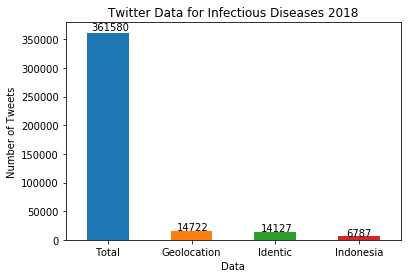

In [13]:
ax = data.plot(x='data', y='freq',kind="bar", rot=0, legend=None)
ax.set_alpha(0.5)
ax.set_xlabel('Data')
ax.set_ylabel('Number of Tweets')
ax.set_title('Twitter Data for Infectious Diseases 2018')

ax.text(ax.patches[0].get_x()+0.05, ax.patches[0].get_height()+5000, str(ax.patches[0].get_height()), fontsize=10)
ax.text(ax.patches[1].get_x()+0.075, ax.patches[1].get_height()+2000, str(ax.patches[1].get_height()), fontsize=10)
ax.text(ax.patches[2].get_x()+0.08, ax.patches[2].get_height()+1000, str(ax.patches[2].get_height()), fontsize=10)
ax.text(ax.patches[3].get_x()+0.1, ax.patches[3].get_height()+300, str(ax.patches[3].get_height()), fontsize=10)

plt.show()

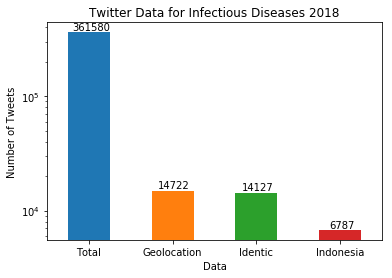

In [14]:
ax = data.plot(x='data', y='freq',kind="bar", rot=0, logy=True, legend=None)
ax.set_alpha(0.5)
ax.set_xlabel('Data')
ax.set_ylabel('Number of Tweets')
ax.set_title('Twitter Data for Infectious Diseases 2018')

ax.text(ax.patches[0].get_x()+0.05, ax.patches[0].get_height()+15000, str(ax.patches[0].get_height()), fontsize=10)
ax.text(ax.patches[1].get_x()+0.075, ax.patches[1].get_height()+1000, str(ax.patches[1].get_height()), fontsize=10)
ax.text(ax.patches[2].get_x()+0.08, ax.patches[2].get_height()+1000, str(ax.patches[2].get_height()), fontsize=10)
ax.text(ax.patches[3].get_x()+0.125, ax.patches[3].get_height()+300, str(ax.patches[3].get_height()), fontsize=10)

plt.show()

# Text Preprocessing

In [15]:
import re
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from sklearn.feature_extraction.text import CountVectorizer

stop_words = set(stopwords.words('indonesian'))
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def tweet_cleaner(text):
    lower = text.lower()
    no_number = re.sub(r'\d+', '', lower)
    no_url = re.sub(r"http\S+", "", no_number)
    no_dash = no_url.replace("-", " ")
    no_punctuation = no_dash.translate(str.maketrans('', '', string.punctuation))
    no_white_space = re.sub(' +', ' ', no_punctuation)
    tokens = word_tokenize(no_white_space)
    no_stopwords = [i for i in tokens if not i in stop_words]
    stem = stemmer.stem(' '.join(no_stopwords))
    return stem

result = []
for text in pm_id['text']:
    result.append(tweet_cleaner(text))
pm_id['result'] = result

# create a dataframe from a word matrix
def wm2df(wm, feat_names):
    
    # create an index for each row
    doc_names = ['Doc{:d}'.format(idx) for idx, _ in enumerate(wm)]
    df = pd.DataFrame(data=wm.toarray(), index=doc_names,
                      columns=feat_names)
    return(df)
  
# set of documents
corpora = pm_id.loc[:,'result'].tolist()

# # instantiate the vectorizer object
# cvec = CountVectorizer(lowercase=False, min_df=85)

# # convert the documents into a document-term matrix
# wm = cvec.fit_transform(corpora)

# # retrieve the terms found in the corpora
# tokens = cvec.get_feature_names()

# # create a dataframe from the matrix
# tdm = wm2df(wm, tokens)

KeyboardInterrupt: 

In [1]:
pm_id.to_csv('./preprocessing_data.csv')

NameError: name 'pm_id' is not defined

In [13]:
print(tdm.shape[0])
tdm.head()

6787


,abis,air,aja,anak,at,bakteri,banget,bangun,bgt,biar,...,tau,tidur,tp,trus,tuh,udah,udh,wkwk,ya,yg
Doc0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Doc1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Doc2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Doc3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Doc4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
